# 01 - Exploratory Data Analysis (EDA)

Welcome to the first notebook! Here, you'll explore the carbon emission dataset, understand its variables, and gain initial insights with data visualization.

## 1. Setup and Data Loading

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [15]:
# Load the dataset
df = pd.read_csv('../data/carbon_emission_ml_dataset.csv')
df.head()

,country,year,gdp_per_capita,energy_consumption,population,renewable_energy_pct,urban_pct,co2_emission_per_capita,reference_source
0,USA,2010,48000,300000,310000000,8,82,17.5,World Bank 2010
1,China,2010,4400,290000,1340000000,13,50,6.8,IEA 2010
2,India,2010,1400,90000,1200000000,17,31,1.5,UN 2010
3,Germany,2010,41000,60000,82000000,20,74,9.2,Eurostat 2010
4,Brazil,2010,9500,44000,195000000,43,85,2.3,World Bank 2010


## 2. Overview of the Data

In [16]:
# Check dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
# Show info and data types
df.info()

Rows: 100, Columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  100 non-null    object 
 1   year                     100 non-null    int64  
 2   gdp_per_capita           100 non-null    int64  
 3   energy_consumption       100 non-null    int64  
 4   population               100 non-null    int64  
 5   renewable_energy_pct     100 non-null    int64  
 6   urban_pct                100 non-null    int64  
 7   co2_emission_per_capita  100 non-null    float64
 8   reference_source         100 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 7.2+ KB


In [17]:
# Show basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,100.0,2.014500e+03,2.886751e+00,2010.0,2012.0,2.014500e+03,2.017000e+03,2.019000e+03
gdp_per_capita,100.0,3.289100e+04,2.085867e+04,1400.0,10950.0,4.400000e+04,5.000000e+04,6.100000e+04
energy_consumption,100.0,1.171500e+05,1.195629e+05,32000.0,46750.0,6.050000e+04,1.112500e+05,4.600000e+05
population,100.0,3.681290e+08,4.951099e+08,22000000.0,64475000.0,1.372500e+08,3.185000e+08,1.430000e+09
renewable_energy_pct,100.0,1.951000e+01,1.075108e+01,4.0,12.0,1.750000e+01,2.300000e+01,5.100000e+01
urban_pct,100.0,7.612000e+01,1.737250e+01,31.0,74.0,8.250000e+01,8.625000e+01,9.600000e+01
co2_emission_per_capita,100.0,9.852000e+00,5.174324e+00,1.5,7.1,8.850000e+00,1.472500e+01,1.880000e+01


In [18]:
# List unique countries and years
print("Countries:", df['country'].unique())
print("Years:", df['year'].unique())

Countries: ['USA' 'China' 'India' 'Germany' 'Brazil' 'Russia' 'Japan' 'Canada' 'UK'
 'Australia']
Years: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


## 3. Missing Values and Duplicates

In [19]:
# Check for missing values
df.isnull().sum()

country                    0
year                       0
gdp_per_capita             0
energy_consumption         0
population                 0
renewable_energy_pct       0
urban_pct                  0
co2_emission_per_capita    0
reference_source           0
dtype: int64

In [20]:
# Check for duplicate rows
df.duplicated().sum()

0

## 4. Univariate Analysis

Let's look at the distribution of key features.

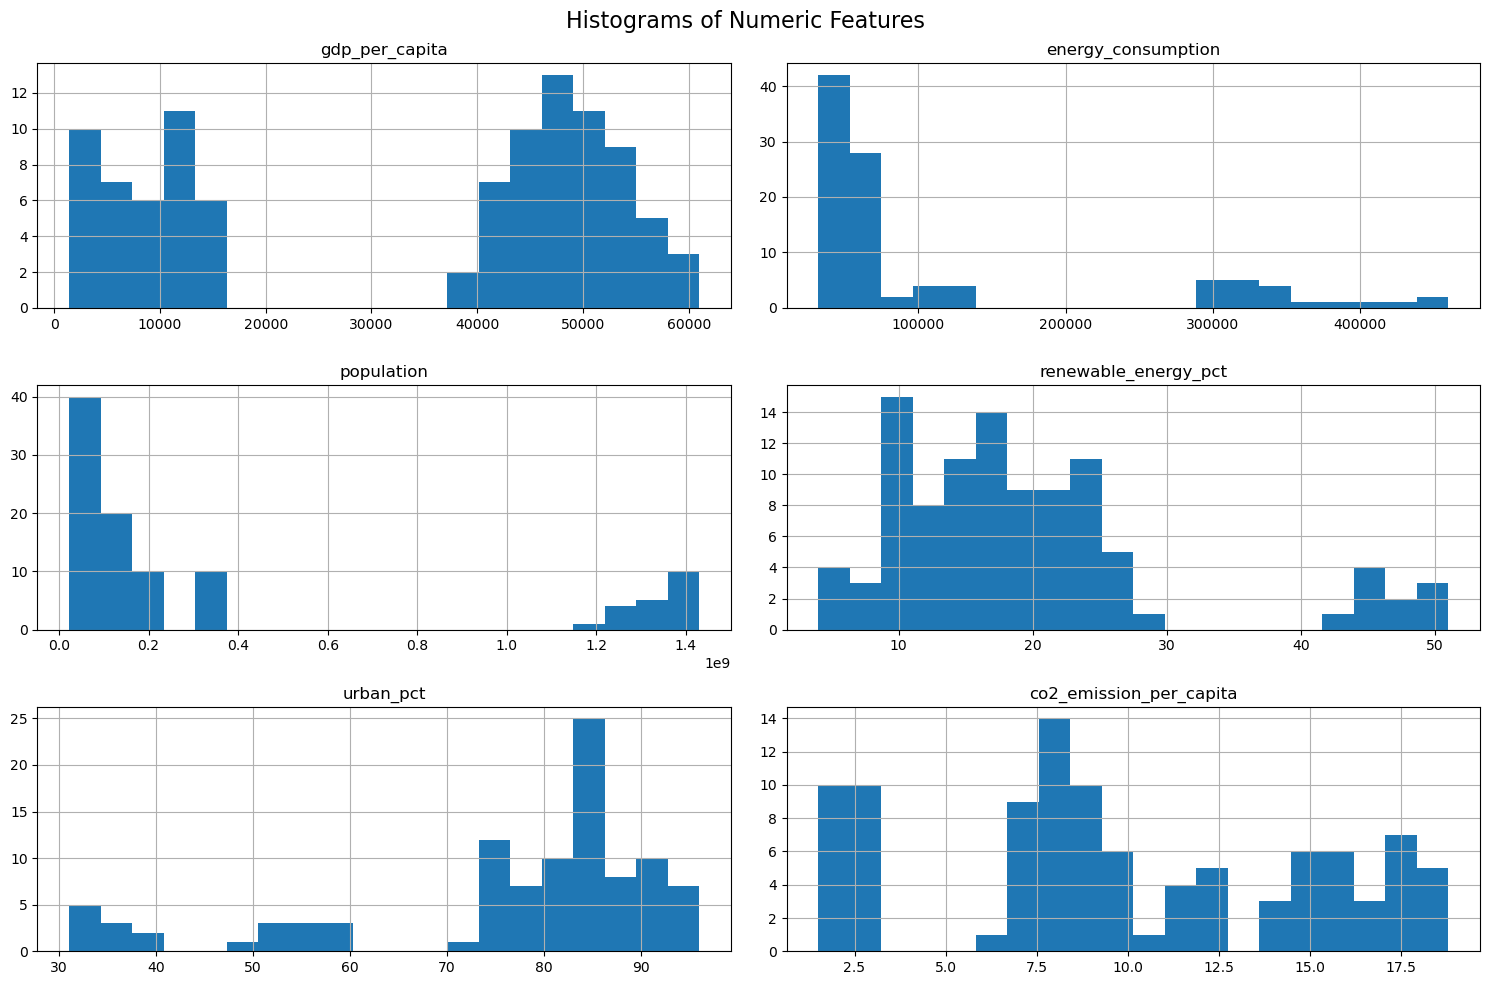

In [21]:
# Histograms for main numeric columns
numeric_cols = ['gdp_per_capita','energy_consumption','population',
                'renewable_energy_pct','urban_pct','co2_emission_per_capita']
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

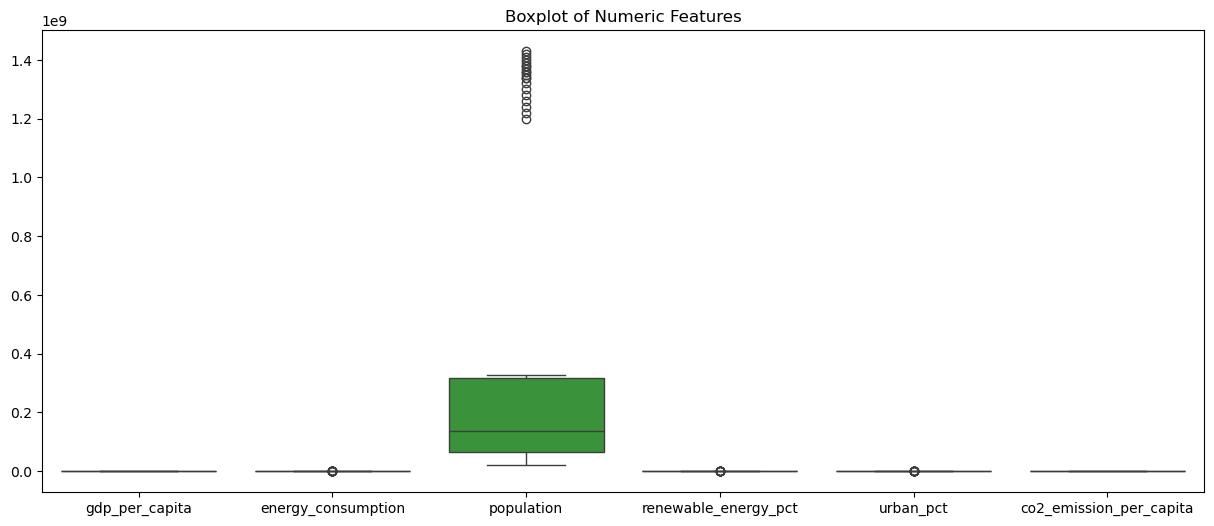

In [22]:
# Boxplots to check for outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Features')
plt.show()

## 5. Bivariate Analysis

Relationships between features and the target.

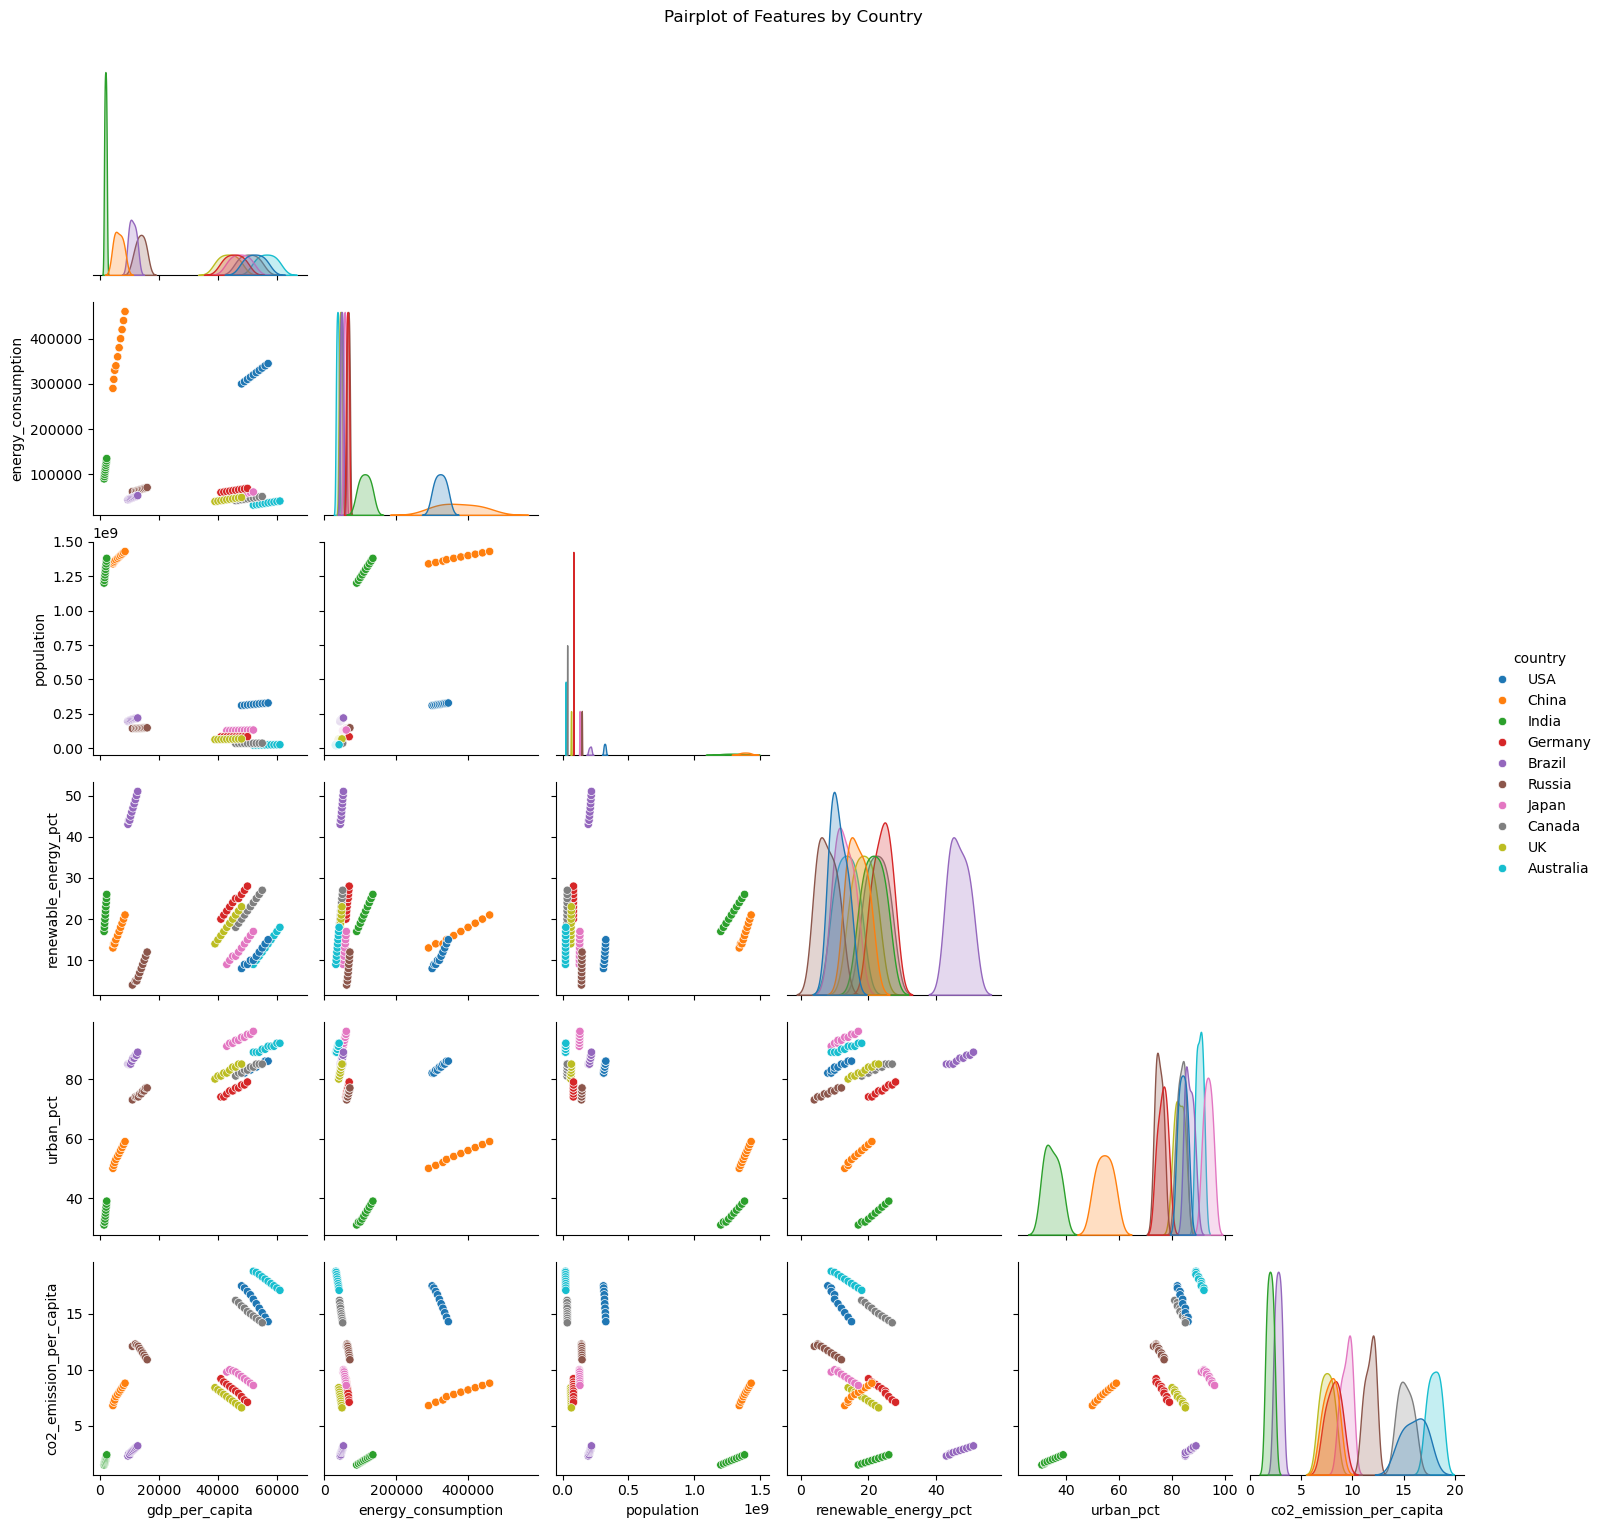

In [23]:
# Pairplot to visualize feature relationships
sns.pairplot(df, vars=numeric_cols, hue='country', corner=True)
plt.suptitle('Pairplot of Features by Country', y=1.02)
plt.show()

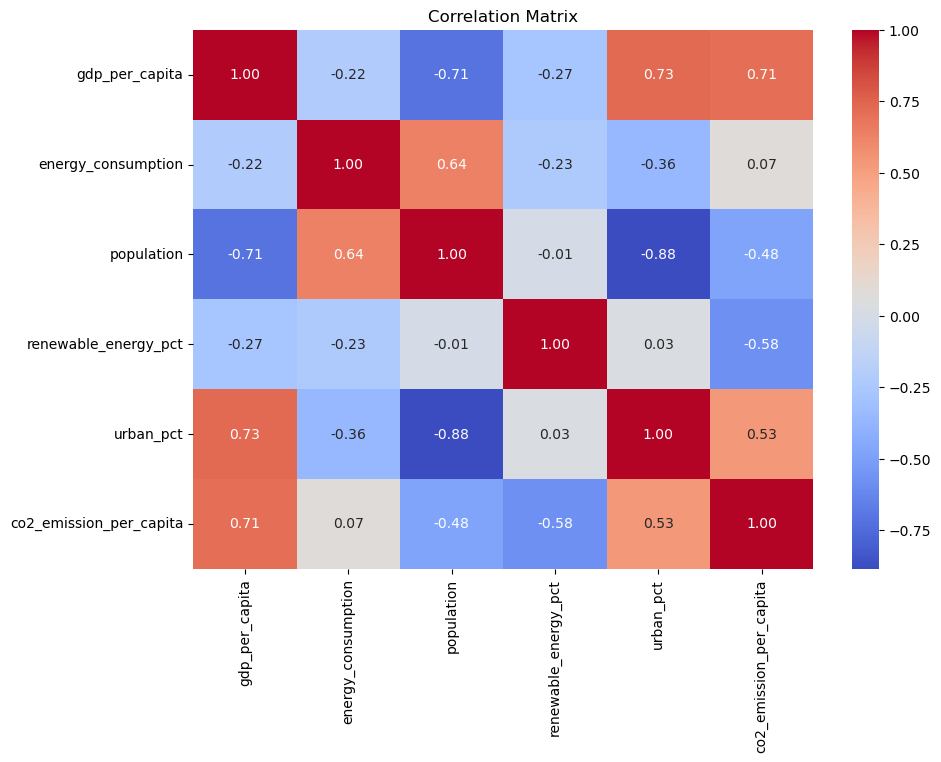

In [24]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 6. Interactive Visualizations

Use Plotly for interactive exploration.

In [25]:
# Interactive scatter plot: GDP vs CO2 emissions
fig = px.scatter(df, x='gdp_per_capita', y='co2_emission_per_capita', color='country',
                 size='population', hover_data=['year'],
                 title='GDP per Capita vs CO2 Emission per Capita')
fig.show()

In [26]:
# Interactive line plot: CO2 emission over time by country
fig = px.line(df, x='year', y='co2_emission_per_capita', color='country', markers=True,
              title='CO2 Emission per Capita Over Time')
fig.show()

## 7. Insights and Next Steps

- Summarize your observations (e.g., which countries have higher/lower emissions, trends, correlations).
- Note any data quality issues or features of interest for modeling.
- Ready to move to modeling? Continue to the `02_model_training_and_comparison.ipynb` notebook.